In [296]:
from matplotlib import pyplot as plt
import numpy as np
import binascii
import cv2 as cv
import math
plt.rcParams["figure.figsize"] = (18,10)

def encode_as_binary_array(msg):
    """Encode a message as a binary string."""
    msg = msg.encode("utf-8")
    msg = msg.hex()
    msg = [msg[i:i + 2] for i in range(0, len(msg), 2)]
    msg = [ "{:08b}".format(int(el, base=16)) for el in msg]
    return "".join(msg)

def decode_from_binary_array(array):
    """Decode a binary string to utf8."""
    array = [array[i:i+8] for i in range(0, len(array), 8)]
    if len(array[-1]) != 8:
        array[-1] = array[-1] + "0" * (8 - len(array[-1]))
    array = [ "{:02x}".format(int(el, 2)) for el in array]
    array = "".join(array)
    result = binascii.unhexlify(array)
    return result.decode("utf-8", errors="replace")

def load_image(path, pad=False):
    """Load an image.
    
    If pad is set then pad an image to multiple of 8 pixels.
    """
    image = cv.imread(path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if pad:
        y_pad = 8 - (image.shape[0] % 8)
        x_pad = 8 - (image.shape[1] % 8)
        image = np.pad(
            image, ((0, y_pad), (0, x_pad) ,(0, 0)), mode='constant')
    return image


def save_image(path, image):
    """Save an image."""
    plt.imsave(path, image) 


def clamp(n, minn, maxn):
    """Clamp the n value to be in range (minn, maxn)."""
    return max(min(maxn, n), minn)

def hide_message(image, message, nbits=1):
    """Hide a message in an image (LSB).
    
    nbits: number of least significant bits
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    if len(message) > len(image) * nbits:
        raise ValueError("Message is to long :(")
    
    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    for i, chunk in enumerate(chunks):
        byte = "{:08b}".format(image[i])
        new_byte = byte[:-nbits] + chunk
        image[i] = int(new_byte, 2)
        
    return image.reshape(shape)

def reveal_message(image, nbits=1, length=0):
    """Reveal the hidden message.
    
    nbits: number of least significant bits
    length: length of the message in bits.
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length/nbits)
    if len(image) < length_in_pixels or length_in_pixels <= 0:
        length_in_pixels = len(image)
    
    message = ""
    i = 0
    while i < length_in_pixels:
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1
        
    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message

# Zadanie 1

In [297]:
original_image = load_image("images/PNG_transparency_demonstration_1.png")

message = "Wiadomosc do ukrycia"
n = 1

encoded_message = encode_as_binary_array(message)
image_with_message = hide_message(original_image, encoded_message, n)

save_image("images/zadanie_1.png", image_with_message)

loaded_image_with_message = load_image("images/zadanie_1.png")

decoded_message = decode_from_binary_array(reveal_message(loaded_image_with_message, nbits=n, length=len(encoded_message)))

print(decoded_message)

Wiadomosc do ukrycia


# Zadanie 2

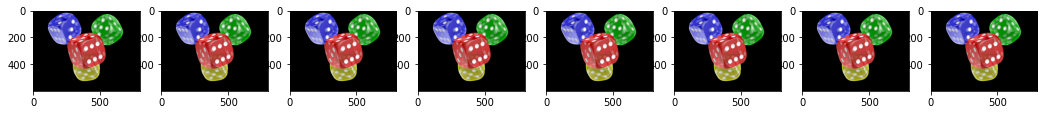

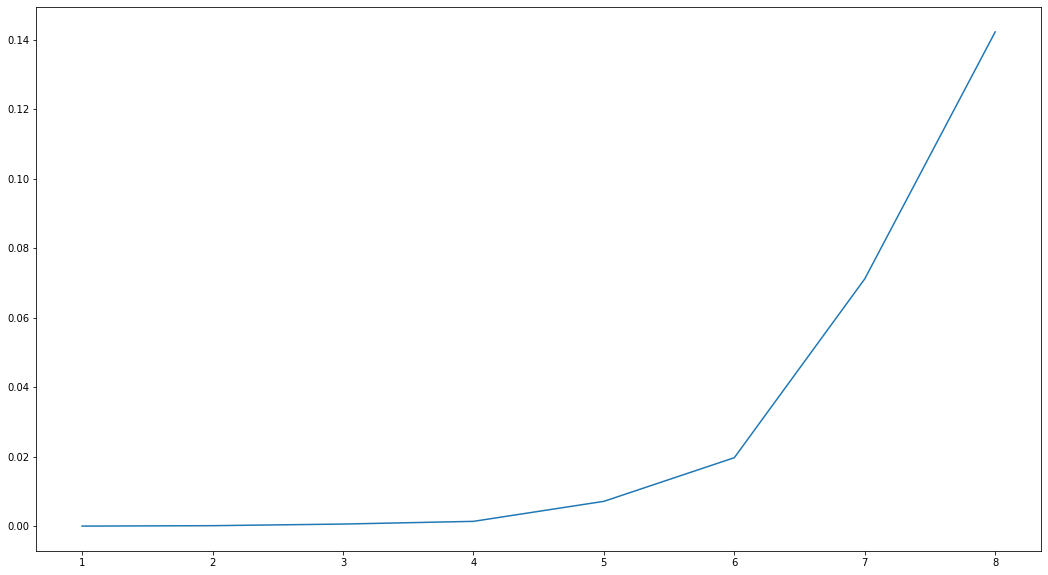

In [298]:
from lorem_text import lorem

original_image = load_image("images/PNG_transparency_demonstration_1.png")

f, ar = plt.subplots(1, 8)
g, mse_plot = plt.subplots()

nbits = 1

message_len = int(len(original_image) * 0.9)    
message = lorem.words(message_len)

mse_results = [0 for x in range(8)]
nbits_values = [1, 2, 3, 4, 5, 6, 7, 8]

for i in range(8):
    
    encode_as_binary_array(message)
    image_with_message = hide_message(original_image, encoded_message, nbits)
        
    ar[i].imshow(image_with_message)
    
    mse = np.sum((original_image.astype("float") - image_with_message.astype("float")) ** 2)
    mse /= float(3 * original_image.shape[0] * original_image.shape[1])
    
    mse_results[i] = mse
   
    nbits += 1

mse_plot.plot(nbits_values, mse_results)


# Zadanie 3

Wiadomosc do ukrycia


Text(0.5, 1.0, 'Loaded image with message')

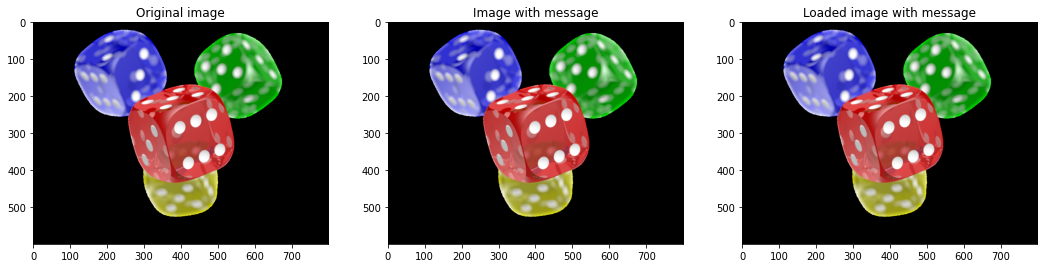

In [299]:
def hide_message_position(image, message, nbits=1, spos=0):
    """Hide a message in an image (LSB).
    
    nbits: number of least significant bits
    """       
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    spos = clamp(spos, 0, len(image) - 1) 
    if len(message) > (len(image) - spos) * nbits:
        raise ValueError("Message is to long :(")
   
    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    for i, chunk in enumerate(chunks):
        byte = "{:08b}".format(image[i + spos])
        new_byte = byte[:-nbits] + chunk
        image[i + spos] = int(new_byte, 2)
        
    return image.reshape(shape)


def reveal_message_position(image, nbits=1, length=0, spos=0):
    """Reveal the hidden message.
    
    nbits: number of least significant bits
    length: length of the message in bits.
    """
    spos = clamp(spos, 0, len(image) - 1)    
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length/nbits)
    if (len(image) - spos) < length_in_pixels or length_in_pixels <= 0:
        length_in_pixels = len(image) - spos
    
    message = ""
    i = spos
    while i < (length_in_pixels + spos):
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1
        
    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message

original_image = load_image("images/PNG_transparency_demonstration_1.png")

message = "Wiadomosc do ukrycia"
n = 1
position = 150

encoded_message = encode_as_binary_array(message)
image_with_message = hide_message_position(original_image, encoded_message, n, spos=position)

save_image("images/zadanie_1.png", image_with_message)

loaded_image_with_message = load_image("images/zadanie_1.png")

decoded_message = decode_from_binary_array(reveal_message_position(loaded_image_with_message, nbits=n, length=len(encoded_message), spos=position))

print(decoded_message)

f, ar = plt.subplots(1, 3)

ar[0].imshow(original_image)
ar[0].set_title("Original image")

ar[1].imshow(image_with_message)
ar[1].set_title("Image with message")

ar[2].imshow(loaded_image_with_message)
ar[2].set_title("Loaded image with message")


# Zadanie 4

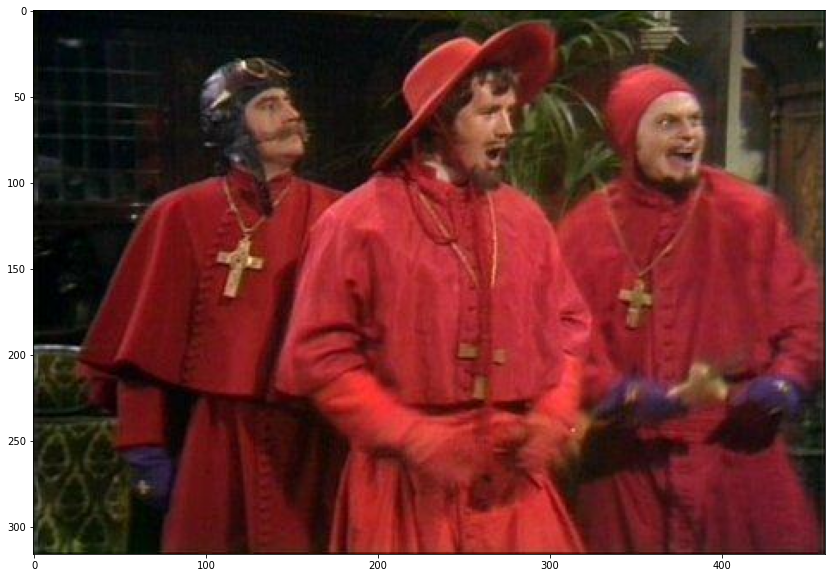

In [300]:
def hide_message(image, message, nbits=1):
    """Hide a message in an image (LSB).
    
    nbits: number of least significant bits
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    if len(message) > len(image) * nbits:
        raise ValueError("Message is to long :(")
    
    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    for i, chunk in enumerate(chunks):
        byte = "{:08b}".format(image[i])
        new_byte = byte[:-nbits] + chunk
        image[i] = int(new_byte, 2)
        
    return image.reshape(shape)


def hide_image(image, secret_image_path, nbits=1):
    with open(secret_image_path, "rb") as file:
        secret_img = file.read()
        
    secret_img = secret_img.hex()
    secret_img = [secret_img[i:i + 2] for i in range(0, len(secret_img), 2)]
    secret_img = ["{:08b}".format(int(el, base=16)) for el in secret_img]
    secret_img = "".join(secret_img)
    return hide_message(image, secret_img, nbits), len(secret_img)


def reveal_message(image, nbits=1, length=0):
    """Reveal the hidden message.
    
    nbits: number of least significant bits
    length: length of the message in bits.
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length/nbits)
    if len(image) < length_in_pixels or length_in_pixels <= 0:
        length_in_pixels = len(image)
    
    message = ""
    i = 0
    while i < length_in_pixels:
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1
        
    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message

def get_hidden_image(image, length, nbits=1):
    revealed_message = reveal_message(image, nbits=nbits, length=length)

    revealed_message_hex = []
    image_found = []

    for i in range(0, len(revealed_message), 8):
        revealed_message_hex.append((hex(int(revealed_message[i:i + 8], 2))))

    for i in range(0, len(revealed_message_hex)):
        if revealed_message_hex[i:i + 4] == ['0xff','0xd8','0xff','0xe0']:            
            image_found = revealed_message_hex[i:i + length]

    with open('images/decoded.jpg', 'wb') as image_file:
        for i in range(len(image_found)):
            image_file.write(bytes(chr(int(image_found[i], 16)), 'iso8859-1'))
            
    decoded_image = load_image("images/decoded.jpg")
    
    return decoded_image

    
nbits = 1
    
image = load_image("images/rembrandt.png")
image_with_secret, length_of_secret = hide_image(image, "images/spanish.jpg", nbits)
decoded_image = get_hidden_image(image_with_secret, length_of_secret, nbits=nbits)    


f, ar = plt.subplots()
ar.imshow(decoded_image)


# Zadanie 5

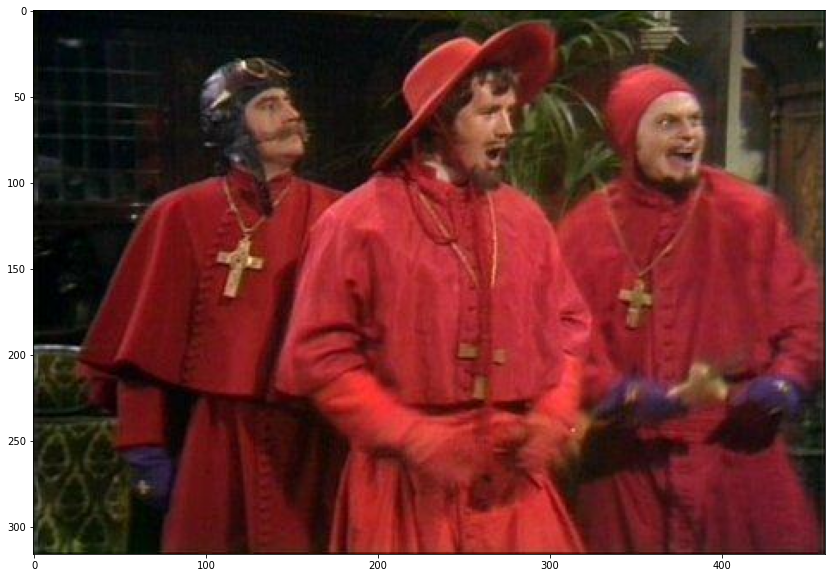

In [301]:
def hide_message(image, message, nbits=1):
    """Hide a message in an image (LSB).
    
    nbits: number of least significant bits
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    if len(message) > len(image) * nbits:
        raise ValueError("Message is to long :(")
    
    chunks = [message[i:i + nbits] for i in range(0, len(message), nbits)]
    for i, chunk in enumerate(chunks):
        byte = "{:08b}".format(image[i])
        new_byte = byte[:-nbits] + chunk
        image[i] = int(new_byte, 2)
        
    return image.reshape(shape)


def hide_image(image, secret_image_path, nbits=1):
    with open(secret_image_path, "rb") as file:
        secret_img = file.read()
        
    secret_img = secret_img.hex()
    secret_img = [secret_img[i:i + 2] for i in range(0, len(secret_img), 2)]
    secret_img = ["{:08b}".format(int(el, base=16)) for el in secret_img]
    secret_img = "".join(secret_img)
    return hide_message(image, secret_img, nbits), len(secret_img)


def reveal_message(image, nbits=1, length=0):
    """Reveal the hidden message.
    
    nbits: number of least significant bits
    length: length of the message in bits.
    """
    nbits = clamp(nbits, 1, 8)
    shape = image.shape
    image = np.copy(image).flatten()
    length_in_pixels = math.ceil(length/nbits)
    if len(image) < length_in_pixels or length_in_pixels <= 0:
        length_in_pixels = len(image)
    
    message = ""
    i = 0
    while i < length_in_pixels:
        byte = "{:08b}".format(image[i])
        message += byte[-nbits:]
        i += 1
        
    mod = length % -nbits
    if mod != 0:
        message = message[:mod]
    return message

def get_hidden_image_without_length(image, nbits=1):
    revealed_message = reveal_message(image_with_secret, nbits=nbits)

    revealed_message_hex = []
    image_found = []

    for i in range(0, len(revealed_message), 8):
        revealed_message_hex.append((hex(int(revealed_message[i:i + 8], 2))))

    for i in range(0, len(revealed_message_hex)):
        if revealed_message_hex[i:i + 4] == ['0xff','0xd8','0xff','0xe0']:            
            while revealed_message_hex[i:i + 2] != ['0xff', '0xd9']:
                image_found.append(revealed_message_hex[i])                
                i += 1

    with open('images/decoded_without_length.jpg', 'wb') as image_file:
        for i in range(len(image_found)):
            image_file.write(bytes(chr(int(image_found[i], 16)), 'iso8859-1'))
            
    decoded_image = load_image("images/decoded_without_length.jpg")
    
    return decoded_image

    
nbits = 1
    
image = load_image("images/rembrandt.png")
image_with_secret, length_of_secret = hide_image(image, "images/spanish.jpg", nbits)
decoded_image = get_hidden_image_without_length(image_with_secret, nbits=nbits)    


f, ar = plt.subplots()
ar.imshow(decoded_image)